<a href="https://colab.research.google.com/github/giramakshay/retail_sales_prediction/blob/main/ML_Capstone_Regression_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name: Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Contributor**     - Akshay Giram

# **Project Summary**



In this project we will develop a machine learning model to pridict sales for the Rossmann drug stores. Managers are required to have predictions of daily sales for upto six weeks in advance. This model will take into consideration various factors that affect sales, like promotions, competition, school and state holidays, seasonality, and locality.

The dataset contains 1 million entries for sales data across 1115 stores.

We will use linear regression to create a machine learning model for prediction of sales.

# **Problem Statement**

***To generate day wise sales predictions for upcoming six weeks from the sales data from across 1100 Rossmann drug stores.***

The prediction model will use linear regression as the machine learning algorithm.

### **Overview of project structure:** ###
* EDA:  Understanding the data, features, and their relations and visualizing the data
* Data clean up: Handling missing values and outliers
* Feature Engineering: Feature encoding and feature selection
* Preprocessing: scaling/standardization, data wrangling
* Model Implementation: model selection, hyperparameter tuning, regularization
* Model explainability: model performance, feature importance, conclusion

# Importing Libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

np.random.seed(42)


In [2]:
sales_df = pd.read_csv("https://github.com/giramakshay/retail_sales_prediction/raw/main/dataset/Rossmann%20Stores%20Data.csv",
                       dtype={'StateHoliday':str}, parse_dates=['Date']) # setting dtype to avoid mixed content warning
stores_df = pd.read_csv("https://github.com/giramakshay/retail_sales_prediction/raw/main/dataset/store.csv")

# EDA

### Understanding variables

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are two datasets (tables), viz, one for sales and other for stores.

#### Sales dataset:

The sales dataset has over a million records (1017209) and 9 attributes. We will see brief details about each attribute.

* **Store** - store id to uniquely identify a store
* **DayOfWeek** - Day of week (in numeric form)
* **Sales** - total sales of the given record (target variable)
* **Customers** - total number of customers on a given day in a given store which generated total sales
* **Open** - whether the store was open: 0 = closed, 1 = open
* **Promo** - indicates whether a store is running a promo on that day 1 = yes, 0 = no promo
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools 1 = yes, 0 = no



#### Stores dataset:

Stores dataset has information on 1115 stores. Following attributes are available for each store.

* **Store** - store id to uniquely identify a store
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSinceMonth** - the approximate month of the time the nearest competitor was opened
* **CompetitionOpenSinceYear** - the approximate year of the time the nearest competitor was opened
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating. This is different from Promo
* **Promo2SinceWeek** - the calendar week when the store started participating in Promo2
* **Promo2SinceYear** - the year when the store started participating in Promo2
* **PromoInterval** - the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Overview

In [5]:
sales_df.sample(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
76435,616,7,2015-05-24,0,0,0,0,0,0
923026,592,2,2013-03-26,5548,710,1,1,0,1
731180,526,6,2013-09-14,7467,1150,1,0,0,0


In [6]:
stores_df.sample(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
843,844,a,a,2030.0,9.0,2012.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
896,897,c,c,3290.0,1.0,2007.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1000,1001,c,a,19640.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
sales_df.shape

(1017209, 9)

In [8]:
stores_df.shape

(1115, 10)

The dataset consists of two tables (or dataframes).
* sales_df contains records of sales day and store wise
* stores_df contains details about each store

sales_df has over a million records containing 9 variables including the target (sales) variable.

stores_df contains data of 1115 stores with 10 attributes on each store.

We will look into detail of each dataframe below.

### Dataset Information

In [9]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Notable takeaways:

* Average sale of a day is: 5773, minimum recorded sale is 0 and maximum is 4155
* Average number of customers visiting a store on a given day is 633
* 75th percentile of customers is 837 customers, while max number of customer appearing in a store is 7388. Looks like there are some outliers here. But we couldn't be sure yet.

* There are competitor stores as close as 20 meters and as far as 75 kms away. Most of them (median) are 2.3 km away)

* The oldest competitor exists since the year 1900


### Exploring variables

We will explore unique values of each variable in **sales_df** dataframe

In [11]:
for col in sales_df.columns:
    if col != 'Date':
        print(f"Variable name: {col}")
        print(f"First 40 Unique values: {sales_df[col].unique()[:40]}")
        print(f"Number of unique values: {sales_df[col].unique().shape}")
        print(" ")
    if col == 'Date':
        print(f"Variable name: {col}")
        print(f"Unique years: {sales_df[col].dt.year.unique()}")
        print(f"Unique months: {sales_df[col].dt.month.unique()}")
        print(f"Unique days: {sales_df[col].dt.day.unique()}")
        print(f"Total number of unique days: {sales_df[col].unique().shape}")
        print(" ")

Variable name: Store
First 40 Unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Number of unique values: (1115,)
 
Variable name: DayOfWeek
First 40 Unique values: [5 4 3 2 1 7 6]
Number of unique values: (7,)
 
Variable name: Date
Unique years: [2015 2014 2013]
Unique months: [ 7  6  5  4  3  2  1 12 11 10  9  8]
Unique days: [31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]
Total number of unique days: (942,)
 
Variable name: Sales
First 40 Unique values: [ 5263  6064  8314 13995  4822  5651 15344  8492  8565  7185 10457  8959
  8821  6544  9191 10231  8430 10071  8234  9593  9515  6566  7273 14190
 14180  7818 13213  7301  9411  4776  7248  6395 10789 11144 12412 12422
  9091  7434  8336  5464]
Number of unique values: (21734,)
 
Variable name: Customers
First 40 Unique values: [ 555  625  821 1498  559  589 1414  833  687  681 1236  962  568  710
  7

Some important points to notice are:

* We have data for 3 years, viz, 2013, 2014, 2015
* Total number of unique days is 942. This means data is recorded for 942 days only, but this data is recorded for each store (for 1115 stores). Thus, 942 x 1115 = 1,050,330 records are present approximately.
* Number of unique sales values is number of total sales figures that are recorded across each day. These values are few as compared to total records. This is because a total sales value could be repeated across records, for example, from the million records, there could be numerous records specifying total sales value of, say $950.
* Same is true for number of total customers, there could be, say, 555 customers visiting a store on a given day, from those million records.

Now, we will explore unique values of each variable in **stores_df** dataframe

In [12]:
for col in stores_df.columns:
    if col != 'Date':
        print(f"Variable name: {col}")
        print(f"First 50 Unique values: {stores_df[col].unique()[:40]}")
        print(f"Number of unique values: {stores_df[col].unique().shape}")
        print(" ")

Variable name: Store
First 50 Unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Number of unique values: (1115,)
 
Variable name: StoreType
First 50 Unique values: ['c' 'a' 'd' 'b']
Number of unique values: (4,)
 
Variable name: Assortment
First 50 Unique values: ['a' 'c' 'b']
Number of unique values: (3,)
 
Variable name: CompetitionDistance
First 50 Unique values: [ 1270.   570. 14130.   620. 29910.   310. 24000.  7520.  2030.  3160.
   960.  1070.  1300.  4110.  3270.    50. 13840.  3240.  2340.   550.
  1040.  4060.  4590.   430.  2300.    60.  1200.  2170.    40.  9800.
  2910.  1320.  2240.  7660.   540.  4230.  1090.   260.   180.  1180.]
Number of unique values: (655,)
 
Variable name: CompetitionOpenSinceMonth
First 50 Unique values: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Number of unique values: (13,)
 
Variable name: CompetitionOpenSinceYear
First 50 Unique values: [2008. 2

The unique values in the stores_df dataframe are true to the variable descriptions provided above. We are not clear how PromoInterval is recorded, but we will test it further later.

## Data Cleaning

### Missing Values

Now we will explore the dataset for missing values and duplicate entries.

In [13]:
# missing values in sales_df dataset
sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no missing values in the sales_df dataframe.

In [14]:
# creating a df of missing values for easy plotting
missing_values = stores_df.isna().sum().sort_values(ascending=False).to_frame().reset_index()
missing_values.columns = ['column','count']
missing_values

,column,count
0,Promo2SinceWeek,544
1,Promo2SinceYear,544
2,PromoInterval,544
3,CompetitionOpenSinceMonth,354
4,CompetitionOpenSinceYear,354
5,CompetitionDistance,3
6,Store,0
7,StoreType,0
8,Assortment,0
9,Promo2,0


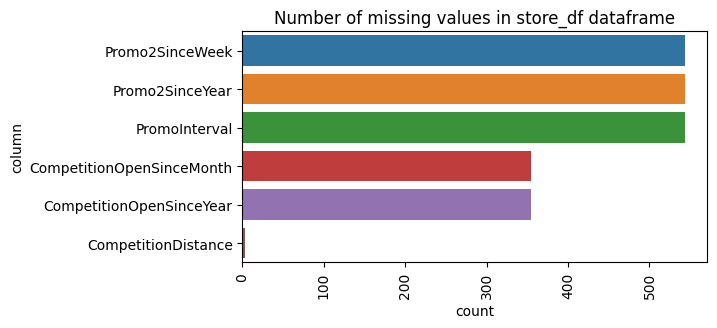

In [15]:
# Visualizing missing values in stores_df
plt.figure(figsize=(6,3))
sns.barplot(missing_values.query("count > 0"), y='column', x='count')
plt.xticks(rotation=90)
plt.title("Number of missing values in store_df dataframe")
plt.show()

In [16]:
# Number of stores that are not running promotion
stores_df.query("Promo2 == 0")['Store'].count()

544

In [17]:
# Entries where promo is 0
stores_df.query("Promo2 == 0").head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Number of stores that are not running promo and missing values in promo related fields are equal. This explains that when the store is not running promo, promo related fields are left empty.

We can impute these missing values with suitable numeric (0) value.

In [18]:
# Checking missing competition data
stores_df.query("CompetitionOpenSinceYear.isna()").head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
# checking missing competition distance
stores_df.query("CompetitionDistance.isna()")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In case of ***CompetitionOpenSinceYear*** and ***CompetitionOpenSinceMonth*** fields are left empty, likely, if data was not available.

We could impute these with suitable (median, mode, mean) values.

CompetitionDistance is not available for exactly 3 records, we could safely impute these with median values.

Now, we will move to data cleaning and data wrangling where we will impute these missing values, and deal with redundant columns.

### Imputing missing values

Let's impute missing values in stores_df where promo2 is 0 and Promo2SinceWeek, PromoSinceYear and PromoInterval are missing. We will impute these with 0.

In [20]:
# Imputing promo related missing fields with with 0



stores_df.fillna({'Promo2SinceWeek':0, 'Promo2SinceYear':0, 'PromoInterval':0}, inplace=True)
stores_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

We will impute 3 missing values for CompetitionDistance with median competition distance.

In [21]:
# filling median values for CompetitionDistance
stores_df.fillna({'CompetitionDistance':stores_df['CompetitionDistance'].median()}, inplace=True)
stores_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

Now, we will impute CompetitionOpenSinceMonth and CompetitionOpenSinceYear with median of each.

In [22]:
# filling median values for CompetitionOpenSince and CompetitionOpenSinceYear
stores_df.fillna({'CompetitionOpenSinceMonth':stores_df['CompetitionOpenSinceMonth'].median()}, inplace=True)
stores_df.fillna({'CompetitionOpenSinceYear':stores_df['CompetitionOpenSinceYear'].median()}, inplace=True)
stores_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Duplicate Values

We will check for and deal with duplicate values in both dataframes

In [23]:
sales_df.duplicated().value_counts()

False    1017209
dtype: int64

In [24]:
stores_df.duplicated().value_counts()

False    1115
dtype: int64

Both dataframes do not contain any duplicate rows/entries.